# Biblioteka Requests

In [6]:
from requests import get

f = get('http://docs.python.org')
s = f.text
f.close()

# print(s)

In [15]:
f = get('http://docs.python.org', stream=True)
# for i in f.iter_lines():
#     print(i.decode('UTF-8'))
f.close()

### Wyciąganie stolicy z Wikipedii

In [54]:
def stolica1(p):
    f = get('https://pl.wikipedia.org/wiki/'+p)
    s = f.text.split("Stolica")[3].split("title=")[1].split("\"")[1]
    f.close()
    return s
print("Stolica v1:",stolica1("Polska"))

def stolica2(p):
    f = get('https://pl.wikipedia.org/wiki/'+p, stream=True)
    b,c,d = "","",""
    for l in f.iter_lines():
        a,b,c,d = (b,c,d,l.decode('UTF-8'))
        if "Stolica" in a:
            f.close()
            return d.split('">',1)[1].split('<')[0]
        
print("Stolica v2:",stolica2("Polska"))

Stolica v1: Warszawa
Stolica v2: Warszawa


In [56]:
from time import time

panstwa = ["Polska","Niemcy","Szwecja","Indie","Japonia","Tanzania","Australia","Kolumbia"]

t = time()
print(list(map(stolica1,panstwa)))
print(time() - t)

t = time()
print(list(map(stolica2,panstwa)))
print(time() - t)

['Warszawa', 'Berlin', 'Sztokholm', 'Nowe Delhi', 'Tokio', 'Dodoma', 'Canberra', 'Bogota']
3.6858420372009277
['Warszawa', 'Berlin', 'Sztokholm', 'Nowe Delhi', 'Tokio', 'Dodoma', 'Canberra', 'Bogota']
2.783376932144165


# Wielowątkowość

### Wyświetlanie

In [57]:
from time import sleep

def old_print(*x):
    for i in x:
        print(i,end="")
        sleep(1e-5)
    print()
    sleep(1e-5)

In [61]:
def f(n):
    for i in range(n):
        old_print(i)

In [65]:
from threading import Thread

thread_1 = Thread(target=f, args=(10,))
thread_2 = Thread(target=f, args=(10,))

thread_1.start()
thread_2.start()

old_print("The end")

0
01
The end
1
2

23

34

4
55

66

77

88

99



In [66]:
from threading import Thread

thread_1 = Thread(target=f, args=(10,))
thread_2 = Thread(target=f, args=(10,))

thread_1.start()
thread_2.start()

thread_1.join()
thread_2.join()

old_print("The end")

00

11

2
2
33

44

55

66

77

88

99

The end


In [76]:
from threading import Thread, Lock

def f(n):
    for i in range(n):
        with lock:
            old_print(i)


lock = Lock()
thread_1 = Thread(target=f, args=(10,))
thread_2 = Thread(target=f, args=(10,))

thread_1.start()
thread_2.start()

thread_1.join()
thread_2.join()

old_print("The end")

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
The end


In [79]:
from threading import Thread, Lock

def f(n,lock):
    for i in range(n):
        with lock:
            old_print(i)


lock = Lock()
thread_1 = Thread(target=f, args=(10,lock))
thread_2 = Thread(target=f, args=(10,lock))

thread_1.start()
thread_2.start()

thread_1.join()
thread_2.join()

old_print("The end")

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
The end


### Lista

In [80]:
from threading import Thread

x = []

def f(*n):
    global x
    for i in range(n[0],n[1]):
        x.append(i)
        sleep(1e-5)

thread_1 = Thread(target=f, args=(1,10))
thread_2 = Thread(target=f, args=(1,10))

thread_1.start()
thread_2.start()

thread_1.join()
thread_2.join()

print(x)
old_print("The end")

[1, 2, 1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]
The end


### ZADANIE: Program który będzie uruchamiał n wątków

In [93]:
from threading import Thread, Lock

def f(n,lock):
    for i in range(n):
        with lock:
            old_print(i)

n = 5
# threads = []
lock = Lock()
# for i in range(n):
#     threads.append(Thread(target=f, args=(10,lock)))
#     threads[i].start()

# for i in range(n):
#     threads[i].join()

threads = [Thread(target=f, args=(10,lock)) for  _ in range(n)]
for w in threads:
    w.start()
    
for w in threads:
    w.join()

old_print("The end")

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
The end


In [104]:
t = time()
for p in panstwa:
    print(f'{p}: {stolica2(p)}')
print("Czas wykonania: ",time() - t)

Polska: Warszawa
Niemcy: Berlin
Szwecja: Sztokholm
Indie: Nowe Delhi
Japonia: Tokio
Tanzania: Dodoma
Australia: Canberra
Kolumbia: Bogota
Czas wykonania:  2.649096965789795


In [105]:
def w_stolica(i):
    print(stolica2(i))

threads = [Thread(target=w_stolica,args=(p,)) for p in panstwa]
t = time()
for w in threads:
    w.start()
for w in threads:
    w.join()
print("Czas wykonania: ",time() - t)

Warszawa
Canberra
Tokio
Dodoma
Berlin
Nowe Delhi
Bogota
Sztokholm
Czas wykonania:  0.7024741172790527


In [108]:
def w_stolica(i):
    with lock:
        print(stolica2(i))
lock = Lock()
threads = [Thread(target=w_stolica,args=(p,)) for p in panstwa]
t = time()
for w in threads:
    w.start()
for w in threads:
    w.join()
print("Czas wykonania: ",time() - t)

Warszawa
Berlin
Sztokholm
Nowe Delhi
Tokio
Dodoma
Canberra
Bogota
Czas wykonania:  2.47900390625


In [109]:
def w_stolica(i):
    st = stolica2(i)
    with lock:
        print(st)
lock = Lock()
threads = [Thread(target=w_stolica,args=(p,)) for p in panstwa]
t = time()
for w in threads:
    w.start()
for w in threads:
    w.join()
print("Czas wykonania: ",time() - t)

Warszawa
Berlin
Nowe Delhi
Tokio
Dodoma
Sztokholm
Canberra
Bogota
Czas wykonania:  0.45966196060180664


### Mandelbrot

In [110]:
def m(z):
    z0 = z
    for i in range(255):
        if abs(z) > 2:
            return i
        z = z**2 + z0
    return 255

0.8905768394470215


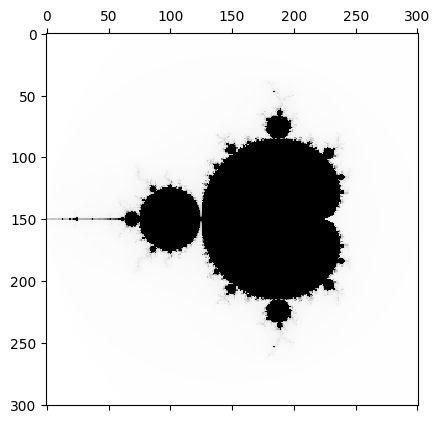

In [136]:
import numpy as np

x = np.arange(-2,1.01,0.01)
y = np.arange(-1.5,1.51,0.01)
x,y = np.meshgrid(x,y)
z = x + 1j * y
s = z.shape

t = time()
res = np.array([[m(z[i,j]) for j in range(s[1])] for i in range(s[0])])
print(time()-t)

import matplotlib.pyplot as plt

plt.matshow(res, cmap='binary')
plt.show()

/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_72522/319751007.py:16: RuntimeWarning: overflow encountered in square
  z = z**2 + z0
/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_72522/319751007.py:16: RuntimeWarning: invalid value encountered in square
  z = z**2 + z0
/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_72522/319751007.py:15: RuntimeWarning: overflow encountered in absolute
  res[np.abs(z)>2] = i


0.177994966506958


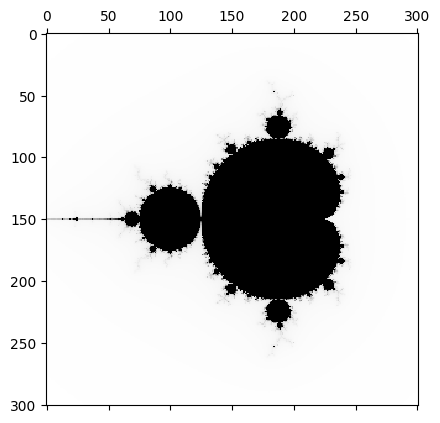

In [2]:
import numpy as np
from time import time

x = np.arange(-2,1.01,0.01)
y = np.arange(-1.5,1.51,0.01)
x,y = np.meshgrid(x,y)
z = x + 1j * y
s = z.shape

t = time()

z0 = np.copy(z)
res = 255 * np.ones(s)
for i in range(255):
    res[np.abs(z)>2] = i
    z = z**2 + z0

print(time()-t)

import matplotlib.pyplot as plt

plt.matshow(res, cmap='binary')
plt.show()

0.4828672409057617


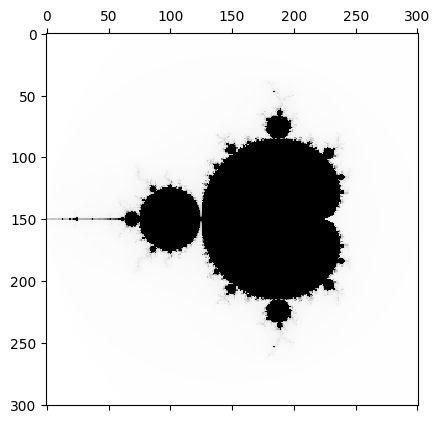

In [4]:
import numpy as np
from time import time

x = np.arange(-2,1.01,0.01)
y = np.arange(-1.5,1.51,0.01)
x,y = np.meshgrid(x,y)
z = x + 1j * y
s = z.shape

@np.vectorize
def m(z):
    z0 = z
    for i in range(255):
        if abs(z) > 2:
            return i
        z = z**2 + z0
    return 255

t = time()
res = m(z)

print(time()-t)

import matplotlib.pyplot as plt

plt.matshow(res, cmap='binary')
plt.show()

### Animacja

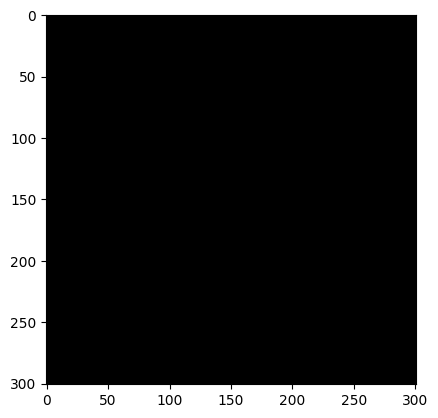

In [12]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x = np.arange(-2,1.01,0.01)
y = np.arange(-1.5,1.51,0.01)
x,y = np.meshgrid(x,y)
z = x + 1j * y
s = z.shape

fig = plt.figure()

z0 = np.copy(z)
res = 255 * np.ones(s)
w = plt.imshow(res,vmin = 0,vmax = 255,cmap = 'binary')

def anim(i):
    global z
    res[np.abs(z)>2] = i
    z = (res == 255) * (z**2+z0)
    w.set_array(res)
    
a = FuncAnimation(fig,anim,frames = 256,interval = 40, repeat = False)

plt.show()

# Sklejanie i rozcinanie macierzy

In [13]:
a = np.ones((3,3))
b = 2 * np.ones((2,3))
c = 5 * np.ones((3,2))

In [14]:
np.vstack((a,b))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [17]:
np.hstack((a,c))

array([[1., 1., 1., 5., 5.],
       [1., 1., 1., 5., 5.],
       [1., 1., 1., 5., 5.]])

In [18]:
np.concatenate((a,b),0)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [19]:
np.concatenate((a,c),1)

array([[1., 1., 1., 5., 5.],
       [1., 1., 1., 5., 5.],
       [1., 1., 1., 5., 5.]])

In [20]:
matrix = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])

In [35]:
print(matrix)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [37]:
print(matrix[1:,1:3])

[[ 6  7]
 [10 11]]


In [38]:
matrix = np.array([[i*j for i in range(20)] for j in range(10)])

In [40]:
print(matrix)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19]
 [  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
   36  38]
 [  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
   54  57]
 [  0   4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68
   72  76]
 [  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
   90  95]
 [  0   6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 102
  108 114]
 [  0   7  14  21  28  35  42  49  56  63  70  77  84  91  98 105 112 119
  126 133]
 [  0   8  16  24  32  40  48  56  64  72  80  88  96 104 112 120 128 136
  144 152]
 [  0   9  18  27  36  45  54  63  72  81  90  99 108 117 126 135 144 153
  162 171]]


In [48]:
s = matrix.shape
n = 4
scat = [matrix[:,i*s[1]//n:(i+1)*s[1]//n] for i in range(n)]
print(scat[3])

[[  0   0   0   0   0]
 [ 15  16  17  18  19]
 [ 30  32  34  36  38]
 [ 45  48  51  54  57]
 [ 60  64  68  72  76]
 [ 75  80  85  90  95]
 [ 90  96 102 108 114]
 [105 112 119 126 133]
 [120 128 136 144 152]
 [135 144 153 162 171]]


# Wielowątkowe rysowanie Mandelbrota

In [66]:
def mand(z):
    z0 = np.copy(z)
    s = z.shape
    res = 255 * np.ones(s)
    for i in range(255):
        res[np.abs(z)>2] = i
        z = z**2 + z0
    return res

/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_72522/150354939.py:16: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  res = np.hstack(l)
/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_72522/1761742527.py:7: RuntimeWarning: overflow encountered in square
  z = z**2 + z0
/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_72522/1761742527.py:7: RuntimeWarning: invalid value encountered in square
  z = z**2 + z0
/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_72522/1761742527.py:6: RuntimeWarning: overflow encountered in absolute
  res[np.abs(z)>2] = i


0.14011001586914062


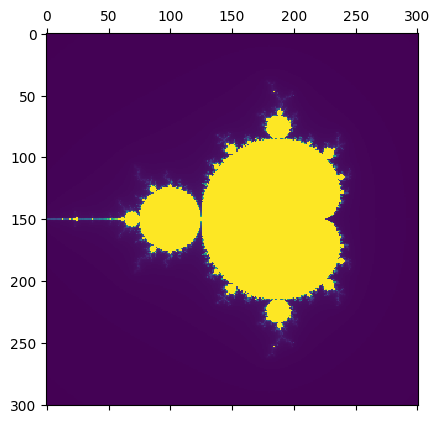

In [67]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x = np.arange(-2,1.01,0.01)
y = np.arange(-1.5,1.51,0.01)
x,y = np.meshgrid(x,y)
z = x + 1j * y
s = z.shape

t = time()
n = 4
l = [z[:,i*s[1]//n : (i+1)*s[1]//n] for i in range(n)]
l = map(mand,l)
res = np.hstack(l)
print(time()-t)

plt.matshow(res)
plt.show()

/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_72522/1811544247.py:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  res = np.hstack(l)
/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_72522/1811544247.py:17: RuntimeWarning: overflow encountered in square
  z = z**2 + z0
/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_72522/1811544247.py:17: RuntimeWarning: invalid value encountered in square
  z = z**2 + z0
/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_72522/1811544247.py:16: RuntimeWarning: overflow encountered in absolute
  res[np.abs(z)>2] = i


0.14361214637756348


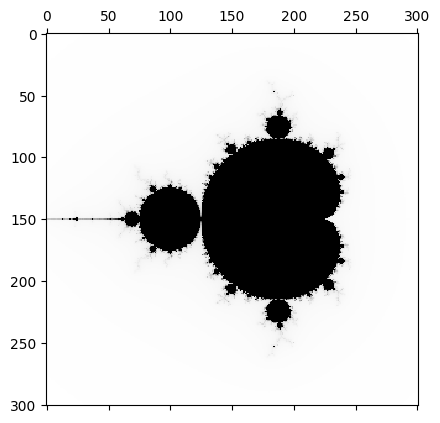

In [72]:
import numpy as np
from time import time
import matplotlib.pyplot as plt

x = np.arange(-2,1.01,0.01)
y = np.arange(-1.5,1.51,0.01)
x,y = np.meshgrid(x,y)
z = x + 1j * y
s = z.shape

def mand(z):
    z0 = np.copy(z)
    s = z.shape
    res = 255 * np.ones(s)
    for i in range(255):
        res[np.abs(z)>2] = i
        z = z**2 + z0
    return res

t = time()
n = 4
l = [z[:,i*s[1]//n : (i+1)*s[1]//n] for i in range(n)]
l = map(mand,l)
res = np.hstack(l)
print(time()-t)

plt.matshow(res, cmap="binary")
plt.show()

/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_81424/1029851954.py:18: RuntimeWarning: overflow encountered in square
  z = z**2 + z0
/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_81424/1029851954.py:18: RuntimeWarning: overflow encountered in square
  z = z**2 + z0
/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_81424/1029851954.py:18: RuntimeWarning: overflow encountered in square
  z = z**2 + z0
/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_81424/1029851954.py:18: RuntimeWarning: overflow encountered in square
  z = z**2 + z0
/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_81424/1029851954.py:18: RuntimeWarning: invalid value encountered in square
  z = z**2 + z0
/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_81424/1029851954.py:18: RuntimeWarning: invalid value encountered in square
  z = z**2 + z0
/var/folders/6b/q78y4w3s385_m145jxn1ysyr0000gn/T/ipykernel_81424/1029851954.py:18: RuntimeWarning: overflow encoun

0.049916982650756836


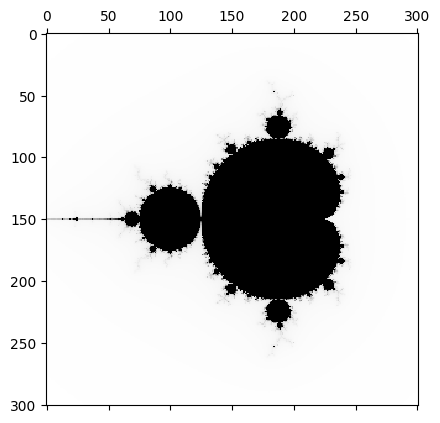

In [1]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
from multiprocess import Pool

x = np.arange(-2,1.01,0.01)
y = np.arange(-1.5,1.51,0.01)
x,y = np.meshgrid(x,y)
z = x + 1j * y
s = z.shape

def mand(z):
    z0 = np.copy(z)
    s = z.shape
    res = 255 * np.ones(s)
    for i in range(255):
        res[np.abs(z)>2] = i
        z = z**2 + z0
    return res

p = Pool()

t = time()
n = 12
l = [z[:,i*s[1]//n : (i+1)*s[1]//n] for i in range(n)]
l = p.map(mand,l)
res = np.hstack(l)
print(time()-t)

plt.matshow(res, cmap="binary")
plt.show()

In [93]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
from multiprocessing import Process, Queue

x = np.arange(-2,1.01,0.01)
y = np.arange(-1.5,1.51,0.01)
x,y = np.meshgrid(x,y)
z = x + 1j * y
s = z.shape

def mand(z,q):
    t = time()
    z0 = np.copy(z)
    s = z.shape
    res = 255 * np.ones(s)
    for i in range(255):
        res[np.abs(z)>2] = i
        z = z**2 + z0
    print("funkcja: ",time()-t)
    q.put(res)

q = Queue()
t = time()
n = 12
l = [z[:,i*s[1]//n : (i+1)*s[1]//n] for i in range(n)]
l = [Process(target=mand,args=(i,q)) for i in l]

t = time()
for i in l:
    i.start()
res = np.hstack([q.get() for _ in range(n)])

print("Program: ",time()-t)

plt.matshow(res,cmap="binary")
plt.show()

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/homebrew/Cellar/python@3.10/3.10.11/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/opt/homebrew/Cellar/python@3.10/3.10.11/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
AttributeError: Can't get attribute 'mand' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/homebrew/Cellar/python@3.10/3.10.11/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/opt/homebrew/Cellar/python@3.10/3.10.11/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle

KeyboardInterrupt: 

In [96]:
import sys
!{sys.executable} -m pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
